In [1]:
clear;
clc;
close;

addpath('../MALSAR/functions/Lasso/'); % load function
addpath('../MALSAR/utils/'); % load utilities

load('../data/school.mat'); % load sample data.



In [2]:
lambda = [1 10 100 200 500 1000 2000];

In [3]:
%rng('default');     % reset random generator. Available from Matlab 2011.
opts.init = 0;      % guess start point from data. 
opts.tFlag = 1;     % terminate after relative objective value does not changes much.
opts.tol = 10^-5;   % tolerance. 
opts.maxIter = 1500; % maximum iteration number of optimization.

sparsity = zeros(length(lambda), 1);
log_lam  = log(lambda);

In [4]:
size(X)

ans =

     1   139



In [5]:
size(X{1})

ans =

   200    28



In [ ]:
for i = 1: length(lambda)
    [W funcVal] = Least_Lasso(X, Y, lambda(i), opts);
    % set the solution as the next initial point. 
    % this gives better efficiency. 
    opts.init = 1;
    opts.W0 = W;
    sparsity(i) = nnz(W);
    weights{i} = W;
    cost{i} = funcVal;
end

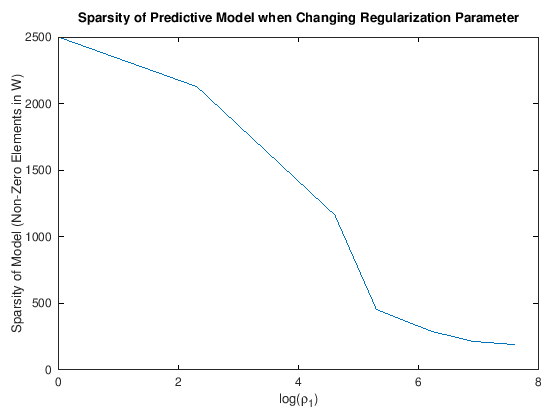

In [5]:
h = figure;
plot(log_lam, sparsity);
xlabel('log(\rho_1)')
ylabel('Sparsity of Model (Non-Zero Elements in W)')
title('Sparsity of Predictive Model when Changing Regularization Parameter');
set(gca,'FontSize',12);

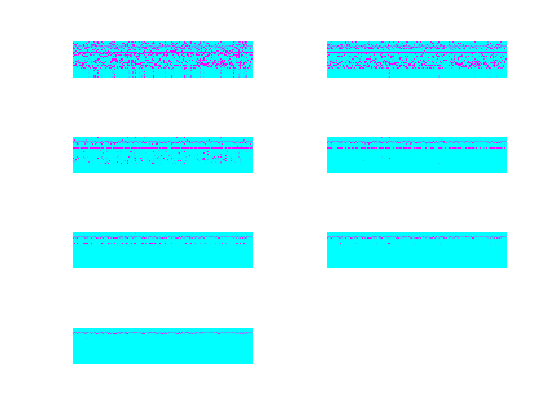

In [12]:
for i=1:length(weights)
    s1 = subplot (4, 2, i);
    imshow(weights{i} ,"colormap", colormap('cool'));
end

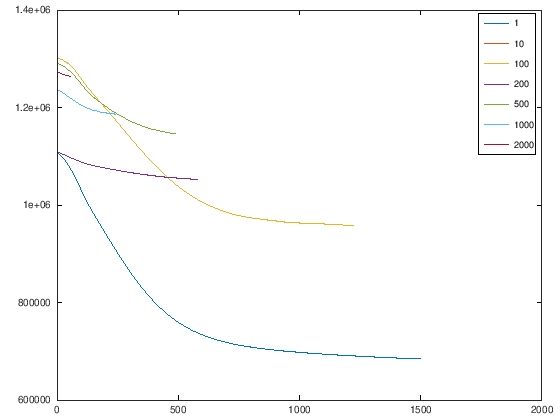

In [26]:
for i=1:length(cost)
    plot(cost{i}, "displayname", num2str(lambda(i)))
    hold on
end

legend()
